In [28]:
import pandas as pd
import numpy as np
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from lazypredict.Supervised import LazyClassifier

In [19]:
df = pd.read_csv('train.csv')
df
X = df.values[:, :-1]
y = df.values[:, -1:]

In [20]:
tree = DecisionTreeClassifier()
bagging_clf = BaggingClassifier(estimators= ,n_estimators=50, random_state=42)

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=False)

In [22]:
bagging_clf.fit(X_train, y_train)

BaggingClassifier(n_estimators=50, random_state=42)

In [23]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [24]:
y_test_pred = bagging_clf.predict(X_test)

In [25]:
accuracy_score(y_test, y_test_pred)

0.8006088280060882

In [26]:
confusion_matrix(y_test, y_test_pred)

array([[ 98,  43],
       [ 88, 428]])

In [27]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

         0.0       0.53      0.70      0.60       141
         1.0       0.91      0.83      0.87       516

    accuracy                           0.80       657
   macro avg       0.72      0.76      0.73       657
weighted avg       0.83      0.80      0.81       657



In [29]:
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)

100%|███████████████████████████████████████████| 32/32 [00:02<00:00, 12.23it/s]


[LightGBM] [Info] Number of positive: 1134, number of negative: 399
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000097 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1803
[LightGBM] [Info] Number of data points in the train set: 1533, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.739726 -> initscore=1.044545
[LightGBM] [Info] Start training from score 1.044545


In [30]:
models

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
GaussianNB,0.86,0.82,0.82,0.86,0.01
NearestCentroid,0.82,0.81,0.81,0.83,0.17
BernoulliNB,0.83,0.81,0.81,0.84,0.04
AdaBoostClassifier,0.86,0.79,0.79,0.86,0.23
PassiveAggressiveClassifier,0.84,0.79,0.79,0.84,0.01
LinearSVC,0.87,0.78,0.78,0.87,0.02
LinearDiscriminantAnalysis,0.87,0.78,0.78,0.87,0.09
KNeighborsClassifier,0.88,0.78,0.78,0.87,0.17
SVC,0.87,0.78,0.78,0.87,0.07


In [31]:
df_copy = df.copy()

In [32]:
df_copy.head()

,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
0,0,1,1017.40,21.20,20.60,19.90,19.40,87.00,88.00,1.10,60.00,17.20,1
1,1,2,1019.50,16.20,16.90,15.80,15.40,95.00,91.00,0.00,50.00,21.90,1
2,2,3,1024.10,19.40,16.10,14.60,9.30,75.00,47.00,8.30,70.00,18.10,1
3,3,4,1013.40,18.10,17.80,16.90,16.80,95.00,95.00,0.00,60.00,35.60,1
4,4,5,1021.80,21.30,18.40,15.20,9.60,52.00,45.00,3.60,40.00,24.80,0


In [33]:
df_copy['cloud88'] = df['cloud'].apply(lambda x: 1 if x == 88 else 0)
df_copy

,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall,cloud88
0,0,1,1017.40,21.20,20.60,19.90,19.40,87.00,88.00,1.10,60.00,17.20,1,1
1,1,2,1019.50,16.20,16.90,15.80,15.40,95.00,91.00,0.00,50.00,21.90,1,0
2,2,3,1024.10,19.40,16.10,14.60,9.30,75.00,47.00,8.30,70.00,18.10,1,0
3,3,4,1013.40,18.10,17.80,16.90,16.80,95.00,95.00,0.00,60.00,35.60,1,0
4,4,5,1021.80,21.30,18.40,15.20,9.60,52.00,45.00,3.60,40.00,24.80,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2185,2185,361,1014.60,23.20,20.60,19.10,19.90,97.00,88.00,0.10,40.00,22.10,1,1
2186,2186,362,1012.40,17.20,17.30,16.30,15.30,91.00,88.00,0.00,50.00,35.30,1,1
2187,2187,363,1013.30,19.00,16.30,14.30,12.60,79.00,79.00,5.00,40.00,32.90,1,0
2188,2188,364,1022.30,16.40,15.20,13.80,14.70,92.00,93.00,0.10,40.00,18.00,1,0


In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

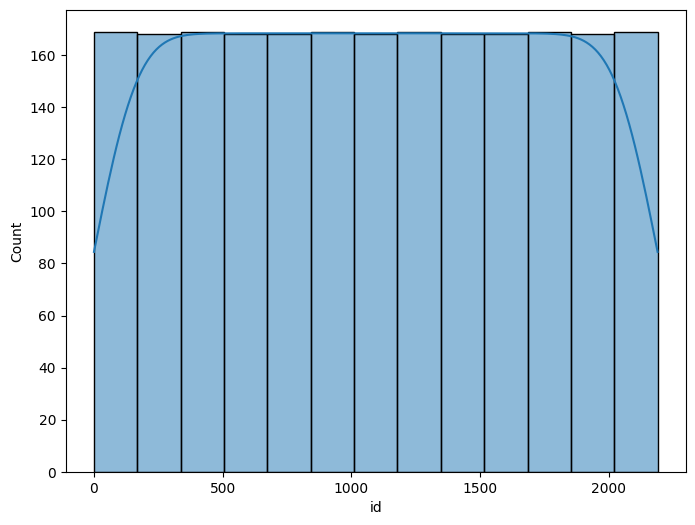

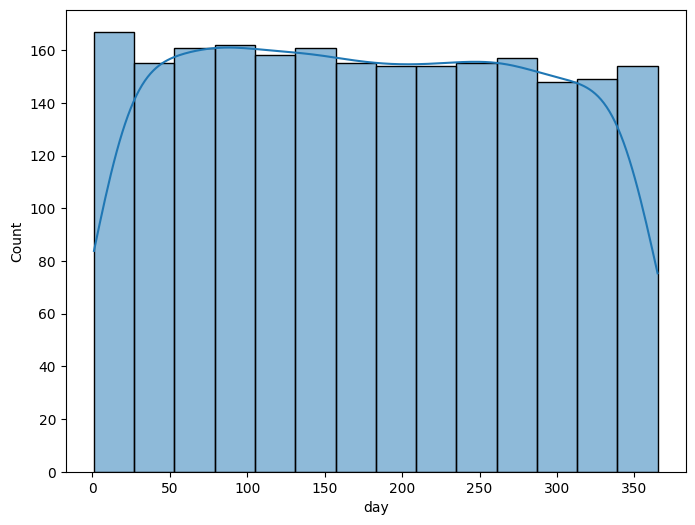

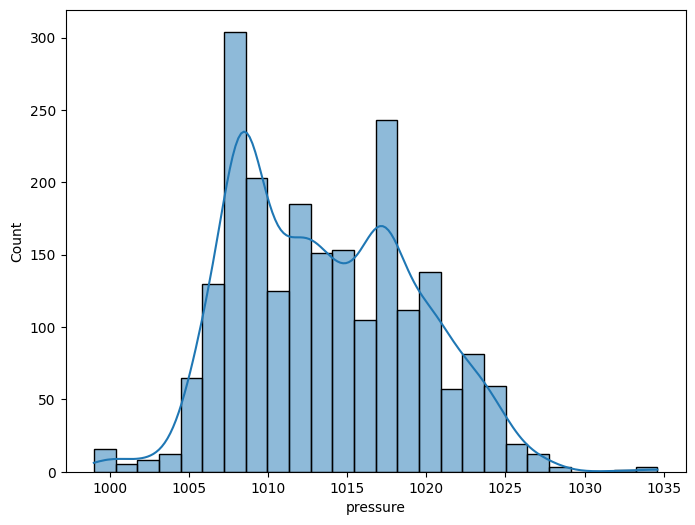

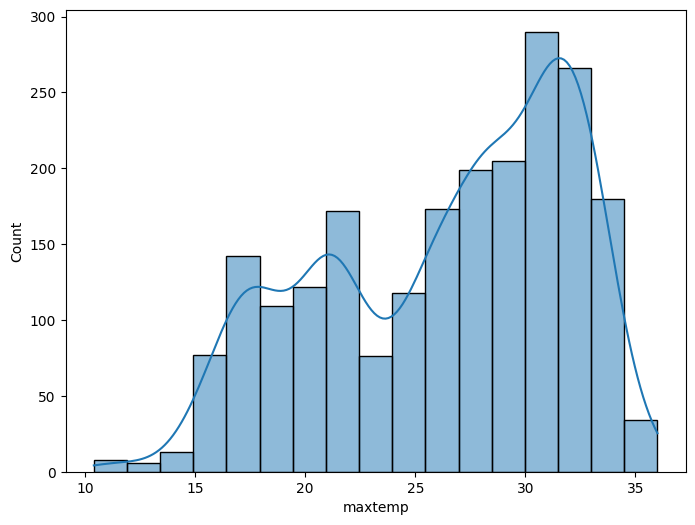

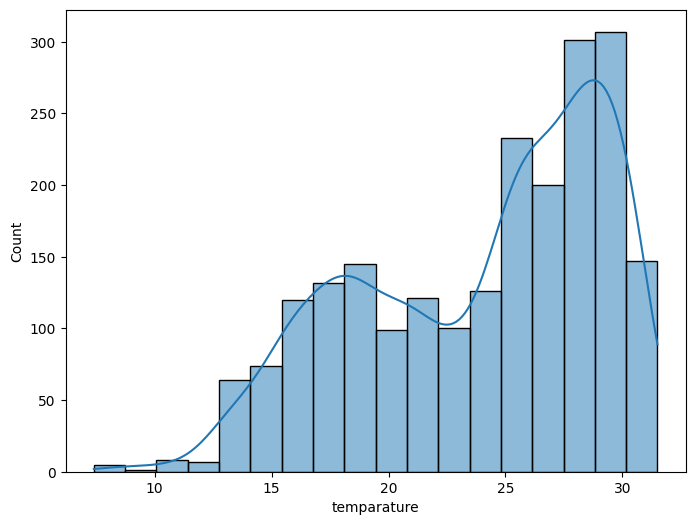

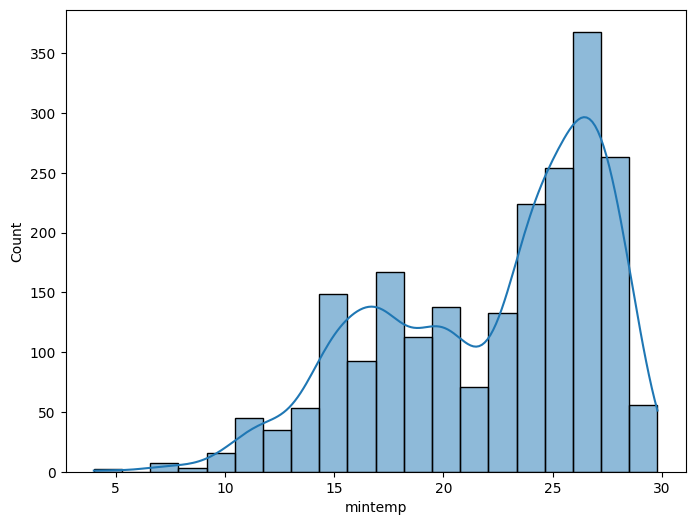

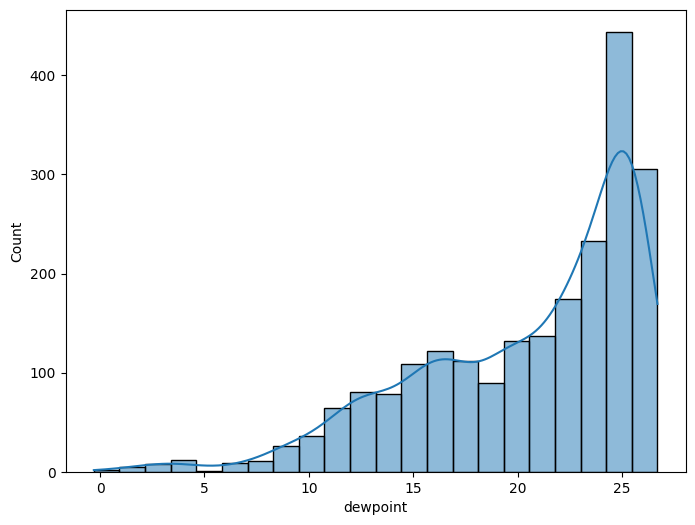

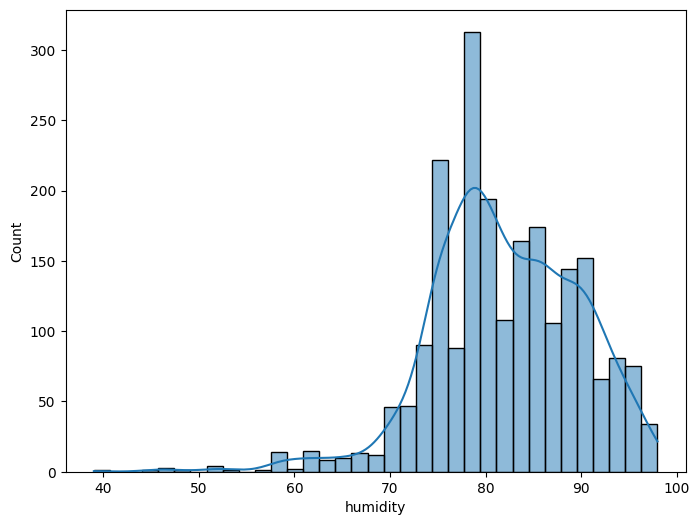

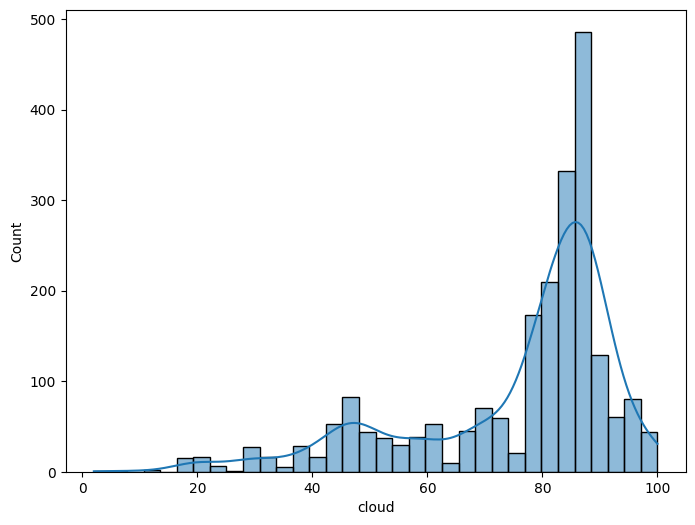

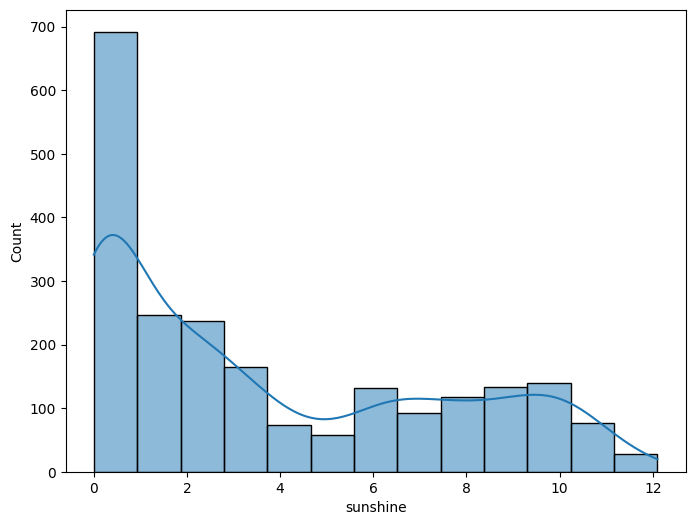

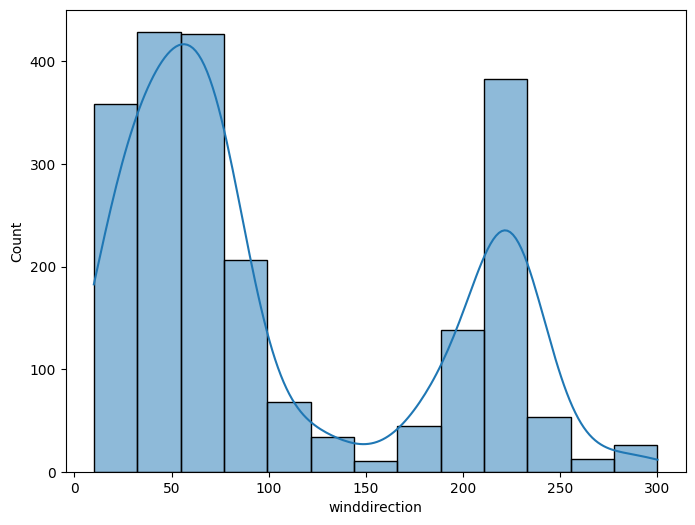

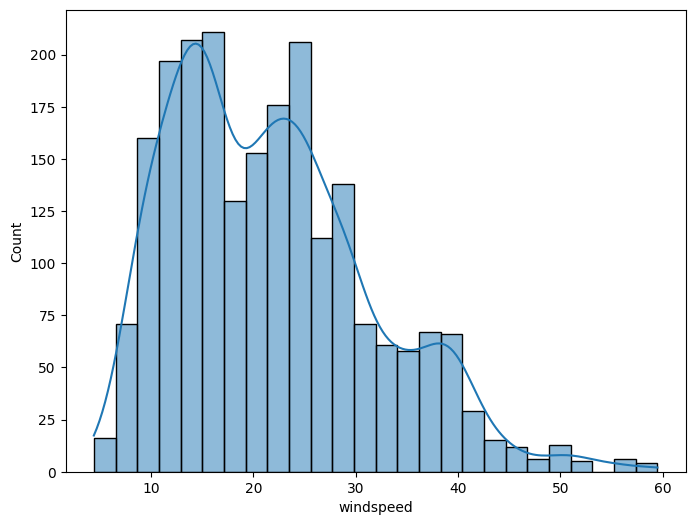

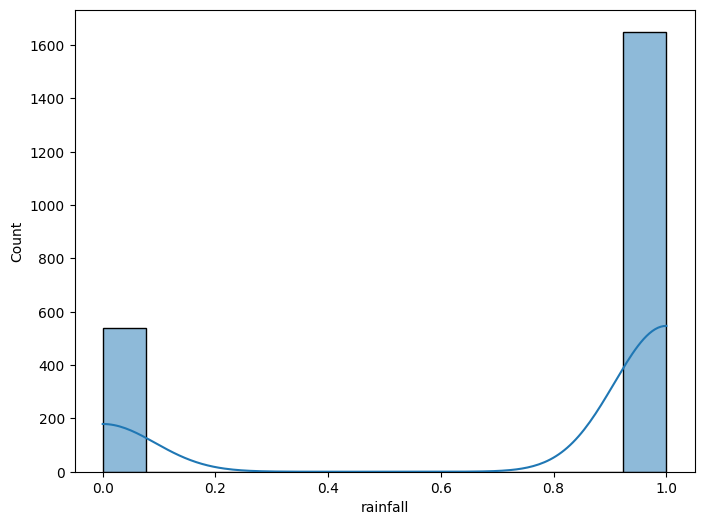

In [49]:
df_num = df.select_dtypes(include = ['float64', 'int64'])
df_num.head()
#df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)
for column in df_num.columns:
    plt.figure(figsize=(8,6))
    sns.histplot(df_num[column], kde=True)